<a href="https://colab.research.google.com/github/ipark2/test_project/blob/main/Class_7_Unsupervised_learning_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

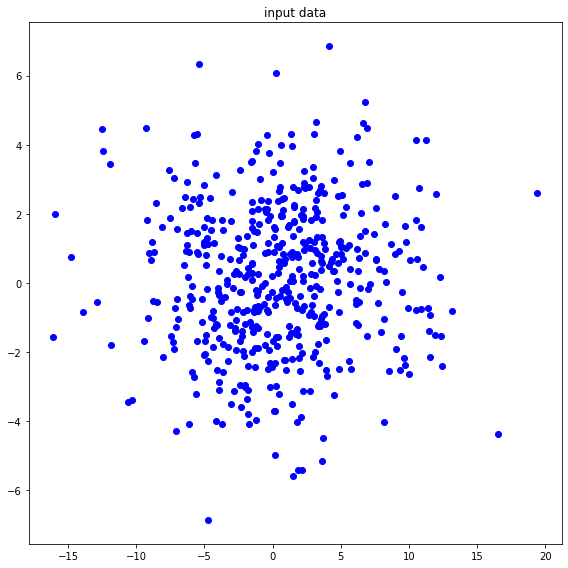

In [9]:
x = 5 * np.random.randn(500)
y = 2 * np.random.randn(500)

feature = np.zeros((500,2))
feature[:, 0] = x
feature[:, 1] = y

plt.figure(figsize=(8,8))
plt.title('input data')

plt.scatter(x,y, color='blue') #제일중요

plt.tight_layout()
plt.show()

In [10]:
num_data = np.size(feature, axis=0)
num_feature = np.size(feature, axis=1)

print(f'number of data: {num_data}')
print(f'number of feature : {num_feature}')

number of data: 500
number of feature : 2


In [34]:
cluster_k = 4
iteration = 10
loss = np.zeros(iteration)
label_pred = np.random.randint(0, cluster_k, size=(num_data))
distance = np.zeros((num_data, cluster_k))
distance.shape

(500, 4)

In [36]:
center = np.zeros(shape=(cluster_k, num_feature)) # 2x2
cluster_1 = feature[np.where(label_pred==0)]
center[0] = np.sum(cluster_1, axis=0) / len(cluster_1)
cluster_2 = feature[np.where(label_pred==1)]
center[1] = np.sum(cluster_2, axis=0) / len(cluster_2)
center

array([[0.03386599, 0.24563124],
       [0.86867224, 0.22302482],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [22]:
loss_1 = np.sum((feature-center[0])**2, axis=1)
loss_2 = np.sum((feature-center[1])**2, axis=1)

In [23]:
distance[:, 0] = loss_1
distance[:, 1] = loss_2

In [27]:
label_pred = np.argmin(distance, axis=1)
label_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [38]:
center = np.zeros(shape=(cluster_k, num_feature))
distance = np.zeros(shape=(num_data, cluster_k))
temp_center = np.zeros(shape=(cluster_k, num_feature))

for i in range(iteration):
  for j in range(cluster_k):
    cluster = feature[np.where(label_pred==j)]
    center[j] = np.sum(cluster, axis=0) / len(cluster)
    distance[:,j] = np.sum((feature - center[j]) **2, axis=1)

  label_pred = np.argmin(distance, axis=1)

  loss[i] = sum(distance[range(num_data),label_pred]) / num_data


In [30]:
print(loss)

[15.40843257 15.36797376 15.3615304  15.3615304  15.3615304  15.3615304
 15.3615304  15.3615304  15.3615304  15.3615304 ]


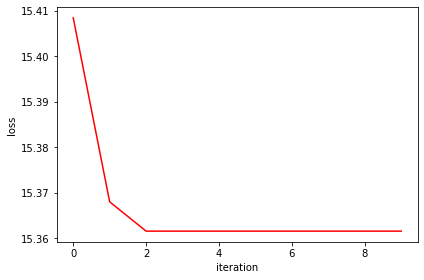

In [31]:
plt.plot(loss, '-', color='red')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.tight_layout()
plt.show()

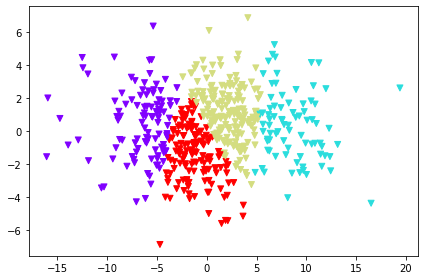

In [39]:
plt.scatter(feature[:,0], feature[:,1], marker = 'v', c = label_pred, cmap = 'rainbow')

plt.tight_layout()
plt.show()